#### loading data set

In [2]:
import sklearn.datasets
import numpy as np
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
x = breast_cancer.data
y = breast_cancer.target 

In [4]:
print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [5]:
print(x.shape,y.shape)

(569, 30) (569,)


In [6]:
 import pandas as pd
 

In [7]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [8]:
data['class'] = breast_cancer.target

In [9]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
print(data['class'].value_counts()) #values counts is for showing values for each 1 and 0

1    357
0    212
Name: class, dtype: int64


In [12]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [13]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#### test train split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = data.drop('class', axis = 1) #row  = 0
y = data['class']

In [16]:
type(x)

pandas.core.frame.DataFrame

In [17]:
x_train,  x_test, y_train, y_test = train_test_split(x,y)

In [18]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (426, 30) (143, 30)


In [19]:
x_train,  x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

In [20]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (512, 30) (57, 30)


In [21]:
print(y.shape, y_train.shape, y_test.shape)

(569,) (512,) (57,)


In [22]:
x_train,  x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

In [23]:
print(y.mean(), y_train.mean (), y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [24]:
x_train,  x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1 , stratify =y) #stratify sees that it splits correctly less diffrently and maintain ratios of ml and bl

In [25]:
print(y.mean(), y_train.mean (), y_test.mean()) #now we can see there is only a little difference in y

0.6274165202108963 0.626953125 0.631578947368421


In [26]:
print(x_train.mean(),x_test.mean(), x.mean())

mean radius                 14.203352
mean texture                19.346699
mean perimeter              92.504902
mean area                  662.110352
mean smoothness              0.096356
mean compactness             0.105067
mean concavity               0.089470
mean concave points          0.049632
mean symmetry                0.181151
mean fractal dimension       0.062700
radius error                 0.411111
texture error                1.211932
perimeter error              2.909060
area error                  41.328824
smoothness error             0.007023
compactness error            0.025452
concavity error              0.031538
concave points error         0.011839
symmetry error               0.020518
fractal dimension error      0.003762
worst radius                16.369557
worst texture               25.661191
worst perimeter            107.980430
worst area                 892.741797
worst smoothness             0.132127
worst compactness            0.254458
worst concav

In [27]:
x_train,  x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1,random_state =1)

#### binarisation

In [28]:
import matplotlib.pyplot as plt


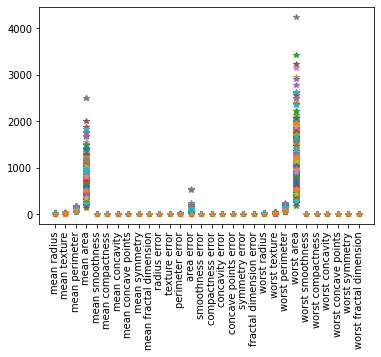

In [29]:
plt.plot(x_train.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [30]:
x_binarised_3_train = x_train['mean area'].map(lambda x : 0 if x<1000 else 1)

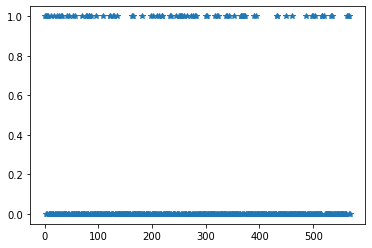

In [31]:
plt.plot(x_binarised_3_train,'*')

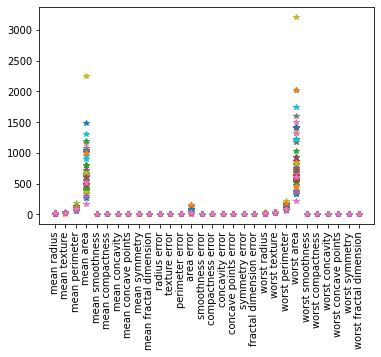

In [32]:
plt.plot(x_test.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [33]:
x_binarised_3_test = x_test['mean area'].map(lambda x : 0 if x<1000 else 1)

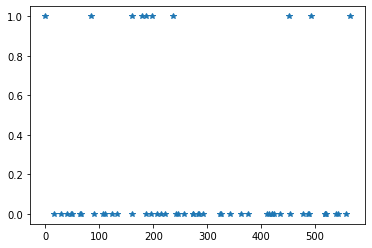

In [34]:
plt.plot(x_binarised_3_test,'*')

In [35]:
x_binarised_train = x_train.apply(pd.cut , bins = 2 , labels = [1,0])

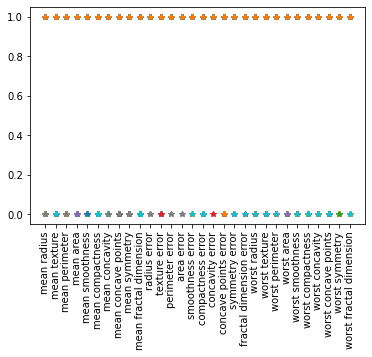

In [36]:
plt.plot(x_binarised_train.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [37]:
x_binarised_test = x_test.apply(pd.cut , bins = 2 , labels = [1,0])

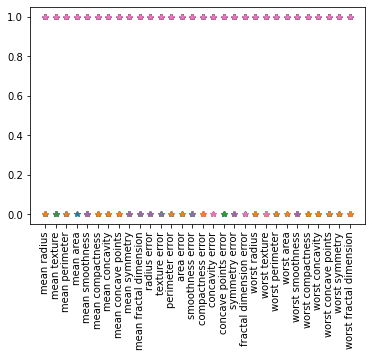

In [38]:
plt.plot(x_binarised_test.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [39]:
type(x_binarised_test)

pandas.core.frame.DataFrame

In [40]:
x_binarised_test = x_binarised_test.values
x_binarised_train = x_binarised_train.values

In [41]:
type(x_binarised_test)

numpy.ndarray

### MP neuron model

In [42]:
from random import  randint

In [43]:
b = 3
i = randint(0 , x_binarised_train.shape[0])
print('for row', i)
if(np.sum(x_binarised_train[100 , :]) >= b):
  print('MP Neuron interface is malignant')
else:
  print('MP Neuron is brnign')

if(y_train[i] == 1):
  print('ground truth is malignant')
else:
  print('Ground truth is benign')

for row 372
MP Neuron interface is malignant
Ground truth is benign


In [44]:
b = 3
y_pred_train = []
accurate_rows = 0

for x,y in zip(x_binarised_train, y_train):
  y_pred = (np.sum(x)>=b)
  y_pred_train.append(y_pred)
  accurate_rows += (y==y_pred)

print(accurate_rows, accurate_rows/x_binarised_train.shape[0])

323 0.630859375


In [45]:
for b in range(x_binarised_train.shape[1] + 1):
  y_pred_train = []
  accurate_rows = 0

  for x,y in zip(x_binarised_train, y_train):
    y_pred = (np.sum(x)>=b)
    y_pred_train.append(y_pred)
    accurate_rows += (y==y_pred)

  print(b, accurate_rows/x_binarised_train.shape[0])
 

0 0.630859375
1 0.630859375
2 0.630859375
3 0.630859375
4 0.630859375
5 0.630859375
6 0.630859375
7 0.630859375
8 0.630859375
9 0.630859375
10 0.630859375
11 0.630859375
12 0.630859375
13 0.6328125
14 0.63671875
15 0.640625
16 0.646484375
17 0.65625
18 0.662109375
19 0.66796875
20 0.67578125
21 0.697265625
22 0.71484375
23 0.73828125
24 0.775390625
25 0.80859375
26 0.837890625
27 0.86328125
28 0.859375
29 0.828125
30 0.759765625


In [46]:
from sklearn.metrics import accuracy_score

In [47]:
import numpy as np

In [50]:
b = 27
y_pred_test = []


for x in x_binarised_test:
  y_pred = (np.sum(x) >= b)
  y_pred_test.append(y_pred)

accuracy = accuracy_score(y_pred_test , y_test)

print(b, accuracy)

27 0.7543859649122807


#### mp neuron class

In [51]:
from sklearn.metrics import accuracy_score

In [70]:
class MPNeuron:
  def __init__(self):
    self.b = None
  def model(self,x):
    return(sum(x) >= self.b)
  def predict(self,x):
    y = []
    for x in x:
      result = self.model(x)
      y.append(result)
    return np.array(y)

  def fit(self, x, y):
    accuracy = {}

    for b in range(x.shape[1] + 1):
      self.b = b
      y_pred = self.predict(x)
      accuracy[b] = accuracy_score(y_pred,y)
    best_b = max(accuracy, key= accuracy.get)
    self.b = best_b
    print('optimal of b = ', best_b)
    print('Highest possible accuracy is ' , accuracy[best_b])

In [71]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_binarised_train , y_train)

optimal of b =  27
Highest possible accuracy is  0.86328125


In [72]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_binarised_test , y_test)

optimal of b =  20
Highest possible accuracy is  0.7543859649122807


In [73]:
y_test_pred = mp_neuron.predict(x_binarised_test)
accuracy_test = accuracy_score(y_test_pred , y_test)

In [74]:
print(accuracy_test)

0.7543859649122807
